In [2]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.sms_exact import SMSEMOA_EXACT
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
from pymoo.indicators.igd import IGD
from pymoo.util.normalization import normalize
import numpy as np


algos = ['wfg1','wfg2','dtlz1','dtlz2','dtlz4']
no_obs = [10,10,4,4,4]
for i,algo in enumerate(algos):
    for j in range(10):
        n_obj = 2
        problem = get_problem(algo,no_obs[i],n_obj=n_obj)
        pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=136   ).do())
        algorithm = SMSEMOA_MODA()
        start = time.time()
        res_moda = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moda_time = time.time() - start
        algorithm = SMSEMOA()
        start = time.time()
        res_approx_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_time = time.time() - start
        algorithm = SMSEMOA_EXACT()
        start = time.time()
        res_exact_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_exact_time = time.time() - start
        
        
        F_all = np.vstack([
            res_moda.F,
            res_approx_moo.F,
            res_exact_moo.F,
            pf
        ])

        F_norm = normalize(F_all)

        n1 = len(res_moda.F)
        n2 = len(res_approx_moo.F)
        n3 = len(res_exact_moo.F)

        F_moda_n = F_norm[:n1]
        F_approx_n = F_norm[n1:n1+n2]
        F_exact_n = F_norm[n1+n2:n1+n2+n3]
        pf_n = F_norm[n1+n2+n3:]

        igd = IGD(pf_n)
        igd_moda = igd(F_moda_n)
        igd_approx = igd(F_approx_n)
        igd_exact = igd(F_exact_n)
        print(f'{moo_exact_time}\t{igd_exact}\t{moo_time}\t{igd_approx}\t{moda_time}\t{igd_moda}\r\n',end = '')

112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 114 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 118 / 100 117 / 100 116 / 100 115 / 100 114 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 119 / 100 118 / 100 117 / 100 116 / 100 115 / 100 114 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 

KeyboardInterrupt: 

0.0
0.00020933151245117188 s
0.0 0


(0.0002108391054207459, 0.0, 0, -1, 19046)

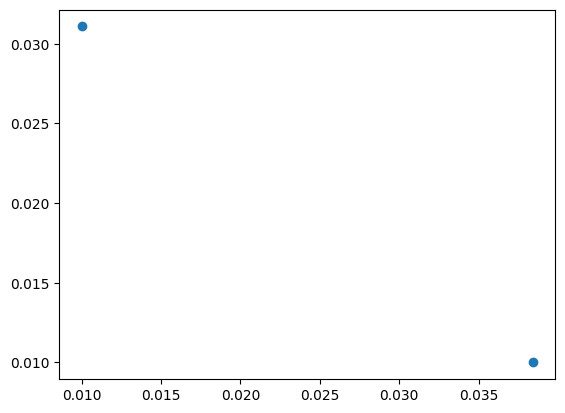

In [ ]:
import moda
import matplotlib.pyplot as plt
import numpy as np
import time
data = np.array(
[#[2.92619838, 0.9824502 ], - 3
 #[2.92918203, 0.98065699],  - 1
 [2.93465479, 0.97180209],
#  [2.91876162, 0.98729564], - 4
 [2.90624133, 0.992886  ]
 #[2.91252783, 0.99025538]  - 2
 ] 
    
)


argmax = data.max(axis=0)
data = -data
data = data - np.min(data, axis=0) + 0.01

plt.scatter(data[:,0], data[:,1])
ds = moda.DataSet(data)


solver = moda.QEHCSolver()
params = moda.QEHCParameters()
iqsolver = moda.IQHVSolver()
iqparams = moda.IQHVParameters()
start = time.time()
total_iqhv = iqsolver.Solve(ds, iqparams)[0]
print(total_iqhv)
hvc = []
for i in range(len(data)):
    data_r = np.delete(data,i,axis=0)
    ds_r = moda.DataSet(data_r)
    ctr = iqsolver.Solve(ds_r,params)[0]
    hvc.append(total_iqhv - ctr)
end = time.time()

hssSolver = moda.HSSSolver()
hssParams = moda.HSSParameters()

print(end - start, 's')
print(np.array(hvc).min(), np.array(hvc).argmin())
r = solver.Solve(ds, params)
r
